In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd

# <font color = 'red'> ЛР 2. Дифференцирование функций многих переменных. Линейная регрессия по произвольному базису. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 07.09.2023

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Дифференцирование функции векторного аргумента. База.  </font>

Вспоминаем понятие дифференцирования.

Пусть, для начала, $f$ - функция одного аргумента, возвращающая один аргумент. Иными словами, $f:\mathbb{R} \rightarrow \mathbb{R}$.

Говорят, что $f$ **дифференцируема** в точке $x_{0}$, если существует конечный предел: $$\lim\limits_{h \to 0} \frac{f(x_{0}+h) - f(x_{0})}{h} = f'(x_{0})$$.

Его называют производной функции в точке $x_{0}$.  Это жу информацию можно записать в дифференциальной форме:  $$f(x_{0}+h) - f(x_{0}) = f'(x_{0}) h + o(h) = [Df_{x_{0}}](h) + o(h)$$.Величину $f'(x_{0}) h = [Df_{x_{0}}](h)$ называют **дифференциалом функции**.


Теперь предположим, что функция $f$ работает несколько иначе. Теперь она принимает на вход векторный аргумент, а возвращает всё ещё скалярный $f:\mathbb{R^{m}} \rightarrow \mathbb{R}$. 

Теперь понятие дифференциала вводят несколько иначе. Мы всё также можем записать: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = \sum\limits_{j=1}^m \frac{\partial f}{\partial x_{m}}\bigg\rvert_{x=\overline{x_{0}}}h_{i} = [Df_{x_{0}}](\overline{h}) + o(||\overline{h}||)$$.

Или же в более сжатой форме: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = (\nabla_{x_{0}} f)\cdot\overline{h} + o(||\overline{h}||) $$

Под производной в этом случае понимают **вектор** (чаще его пищут в виде вектор-столбца) градиента $\nabla_{x_{0}} f = \begin{bmatrix} \frac{\partial f}{\partial x_{1}}\\ \frac{\partial f}{\partial x_{2}}\\...\\\frac{\partial f}{\partial x_{m}} \end{bmatrix}\bigg\rvert_{x=\overline{x_{0}}}$.

В МО мы вынуждены работать с задачами оптимизации как раз таких функций, что немедленно отсылает нас к производным. В частности, используя лекционные записи, вы легко можете получить две несложных формулы матричного дифференцирования.

1. Если функция $f(\overline{x}) = \overline{a}^{T} \cdot\overline{x}$, то $f'(\overline{x}) = \overline{a} $. Где $\overline{x},\overline{a} $ - вектор столбцы.

2.  Если функция $f(\overline{x}) = \overline{x}^{T} A\overline{x}$, то $f'(\overline{x}) = (A+A^{T})\overline{x} $. Где $\overline{x}$ - вектор столбец, $A$ - квадратная матрица соответсвующего размера.


В будущем, возможно, мы дополним список. А пока можете поупражняться [самостоятельно](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf). 


Теперь проверим справедливость формулы 2.

In [2]:
A = np.random.randint(10,size =(10,10))
A

array([[2, 0, 6, 4, 9, 5, 8, 3, 1, 1],
       [1, 9, 1, 5, 5, 4, 3, 0, 0, 1],
       [9, 8, 8, 5, 4, 5, 2, 8, 0, 5],
       [4, 1, 8, 8, 5, 9, 9, 8, 2, 6],
       [4, 4, 7, 8, 3, 3, 2, 5, 9, 0],
       [5, 6, 6, 6, 8, 8, 5, 3, 5, 2],
       [4, 0, 3, 2, 8, 5, 1, 3, 9, 2],
       [6, 3, 4, 2, 0, 7, 3, 4, 9, 0],
       [5, 5, 2, 7, 7, 1, 0, 8, 7, 9],
       [3, 2, 3, 3, 9, 6, 8, 0, 5, 5]])

In [3]:
def func(x): 
    return np.dot(np.dot(x.T,A),x) #задаём вектор-функцию согласно формуле 2

In [4]:
x0 = np.arange(0,10) # конкретные значения x0
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
grad = nd.Gradient(func)(x0) #находим производную в точке x0(градиент) встроенными численными методами
grad

array([376., 246., 381., 496., 453., 451., 352., 355., 541., 384.])

In [6]:
np.dot(A + A.T,x0) # а теперь по нашей формуле. Всё сходится.

array([376, 246, 381, 496, 453, 451, 352, 355, 541, 384])

<font color = 'red' size = 5>Задание 1 </font>

1. Изучите подробно формулы полученные выше. Попрактикуйтесь самостоятельно в их выводе.
2. Получите ещё 2 любых формулы для подобного матричного или векторного дифференцирования. Вывод формул кратко оформите в документе.
3. Проверьте справедливость полученных вами формул с помощью встроенных функций пакета numdifftools.

### 1. $\alpha = x^T x$

$\alpha$ - скаляр,  $x$ - $n$x1, $x$ - функция от вектора $z$. Тогда:

$$\displaystyle \frac{\partial \alpha}{\partial z} = 2x^T  \displaystyle \frac{\partial x}{\partial z}$$

Доказательство.

$\alpha = \sum \limits_{i=1}^{n} x_{i}x_{i} ,  \forall k = 1,2, ..., n$

Дифференцируем $z$ по $k$-му элементу и получаем:

$\displaystyle \frac{\partial \alpha}{\partial z_{k}} = \sum \limits_{i=1}^{n} (x_{i} \displaystyle \frac{\partial x_{k}}{\partial z_{k}} + x_{i} \displaystyle \frac{\partial x_{k}}{\partial z_{k}}) = \sum \limits_{i=1}^{n} 2 x_{i} \displaystyle \frac{\partial x_{k}}{\partial z_{k}}$,

$\forall k = 1, 2, ..., n$

Получаем:

$$\displaystyle \frac{\partial \alpha}{\partial z} = x^T  \displaystyle \frac{\partial x}{\partial z} + x^T  \displaystyle \frac{\partial x}{\partial z} = 2 x^T  \displaystyle \frac{\partial x}{\partial z}$$

In [601]:
def func_x(z):
    return np.dot(x0(z).T, x0(z))

In [596]:
def x0(z):
    return np.arange(0,10)*z

In [599]:
z0 = np.arange(0,10)

In [602]:
grad = nd.Gradient(func_x)(z0) #находим производную в точке x0(градиент) встроенными численными методами
grad

array([   0.,    2.,   16.,   54.,  128.,  250.,  432.,  686., 1024.,
       1458.])

In [606]:
2*np.dot(x0(z0).T, nd.Gradient(x0)(z0))

array([   0.,    2.,   16.,   54.,  128.,  250.,  432.,  686., 1024.,
       1458.])

### 2. $\alpha = y^T Ax$

 $$\displaystyle \frac{\partial \alpha}{\partial y} = x^T A^T$$ 
 
 $$\displaystyle \frac{\partial \alpha}{\partial x} = y^T A$$ 

Определим $w^T = y^T A$, запишем $\alpha = w^T A$

Если $f(\overline{x}) = \overline{a}^{T} \cdot\overline{x}$, то $f'(\overline{x}) = \overline{a} $, где $\overline{x},\overline{a} $ - вектор столбцы. Получаем:

$$\displaystyle \frac{\partial \alpha}{\partial x} = w^T = y^T A$$

Т.к. $\alpha$ - скаляр, можем записать следующее:
$\alpha = \alpha^T = x^T A^T y$, тогда:

$$\displaystyle \frac{\partial \alpha}{\partial y} = x^T A^T$$

In [355]:
def func_x(x): 
    return np.dot(y0.T, np.dot(A, x))

def func_y(y): 
    return np.dot(y.T, np.dot(A, x0))

In [356]:
x0 = np.arange(0,10) # конкретные значения x0
y0 = np.arange(0,10) 

In [357]:
A = np.random.randint(10,size =(10,10))
A

array([[8, 0, 1, 2, 0, 9, 1, 7, 0, 9],
       [3, 1, 7, 3, 9, 5, 8, 6, 5, 2],
       [8, 3, 7, 7, 2, 3, 1, 8, 8, 9],
       [7, 6, 4, 8, 3, 7, 8, 9, 7, 5],
       [3, 7, 5, 5, 8, 9, 9, 2, 8, 9],
       [9, 6, 9, 9, 5, 3, 7, 8, 2, 9],
       [0, 4, 4, 6, 9, 0, 1, 6, 7, 5],
       [2, 3, 7, 7, 0, 5, 0, 8, 4, 7],
       [8, 9, 5, 5, 8, 8, 7, 9, 1, 5],
       [7, 1, 7, 2, 0, 7, 6, 7, 7, 6]])

In [358]:
grad = nd.Gradient(func_x)(x0) #находим производную в точке x0(градиент) встроенными численными методами
grad

array([238., 209., 274., 249., 197., 245., 221., 324., 225., 289.])

In [359]:
np.dot(y0.T,A)

array([238, 209, 274, 249, 197, 245, 221, 324, 225, 289])

In [360]:
grad = nd.Gradient(func_y)(y0) #находим производную в точке x0(градиент) встроенными численными методами
grad

array([189., 233., 268., 297., 322., 281., 215., 214., 264., 251.])

In [361]:
np.dot(x0.T,A.T)

array([189, 233, 268, 297, 322, 281, 215, 214, 264, 251])

## <font color = 'green'> 2. Линейная регрессия по произвольному базису. </font>

Пусть задано множество пар признаков(фич) и меток $A = \{(\overline{X}_{1},y_{1}),(\overline{X}_{2},y_{2}),...,(\overline{X}_{n},y_{n})\}$. Важно понимать, что теперь каждый элемент множества признаков это вектор состоящий из некоторого числа $k$ признаков  $\overline{X}_{i} = (x_{1},x_{2},...x_{k})$.

Стоит задача получить функцию, позволяющую предсказывать непрерывную метку по $y$ набору признаков $X$. Такую задачу называют множественной регрессией. 

Для решения данной задачи можно использовать формулу множественной регрессии:$$f(\overline{x})=\sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{x}) $$.

В приведённой выше формуле, стоит взвешенная сумма некоторых произвольных функций от вектора фич. Это и есть **формула множественной линейной регрессии по произвольному базису**. 

Частным случаем такой регрессии можно считать тривиальную линейную регрессию, когда $\phi_{i}(\overline{x}) = $. Тогда добавив фиктивную функцию $\phi_{0}(\overline{x}) = 1$ получим формулу **классической линейной регрессии**.

$$f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $$.

Обратите внимание, что формула парной регресии $f(x) = a x +b $ - тоже частный случай вышеприведённой. 

Также стоит заметить, *что количество базисных функций может быть как меньшим, так и большим, чем количество изначальных фич*.

Теперь приступим к **обучению полученной модели** $f(\overline{x})=\sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{x}) $. Оно сводится к нахождению весов $w_{1},...,w_{m}$ на основе исходных обучающих данных.

Аналогично парной регрессии составим функцию потерь и минимизируем её: $$ \mathcal{L}(\overline{w}) =\sum\limits_{i=1}^n (y_{i} - \sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{X_{i}}))^2 \rightarrow min$$.

Конечно проще записать эту формулу в матричном виде (получите её самостоятельно): $$ \mathcal{L}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}, $$
где $Q$ - *информационная матрица*, которая определяется следующим образом: $$Q=\begin{bmatrix}
    \phi_{1}(\overline{x_{1}})       &  \phi_{2}(\overline{x_{1}}) & \phi_{3}(\overline{x_{1}}) & \dots & \phi_{m}(\overline{x_{1}}) \\
    \phi_{1}(\overline{x_{2}})       &  \phi_{2}(\overline{x_{2}}) & \phi_{3}(\overline{x_{2}}) & \dots & \phi_{m}(\overline{x_{2}})   \\
                            ...\\
   \phi_{1}(\overline{x_{n}})       &  \phi_{2}(\overline{x_{n}}) & \phi_{3}(\overline{x_{n}}) & \dots & \phi_{m}(\overline{x_{n}}) 
\end{bmatrix}, $$

$\overline{w}$ - вектор столбец весов: $$ \overline{w} = \begin{bmatrix} 
w_{1}\\
w_{2}\\
...\\
w_{m}
\end{bmatrix},
$$

$\overline{y}$ - вектор столбец известных целевых меток: $$ \overline{y} = \begin{bmatrix} 
y_{1}\\
y_{2}\\
...\\
y_{m}
\end{bmatrix}.
$$


Далее решаем задачу оптимизации. Отыщем производную полученной скалярной вектор-функции и приравняем к 0, опираясь на знания из п. 1.$$\frac{\partial \mathcal{L}}{\partial w} = \nabla \mathcal{L} =\nabla \mathcal{L}((\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}) = \nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = 0$$

Далее применяем формулы из п. 1. $$\nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = (-2 Q^{T} \overline{y}+ 2 Q^{T} Q \overline{w}) = 0.$$

Откуда немедленно получаем итоговую формулу для вектора весов: $$\overline{w} = (Q^{T} Q)^{-1} Q^{T} \overline{y}$$.


Полученная формула имеет некоторые ограничения (подумайте какие). Также следует продумывать выбор базисных функций. Для получения *информационной матрицы* исходные данные требуют некоторого преобразования в зависимости от выбора базисных функций.

<font color = 'orange' size = 3>Пример 1 </font>

Для начала используем встроенные возможности.

In [485]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

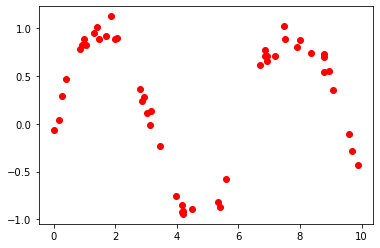

In [363]:
plt.scatter(x, y, c ='red')

In [487]:
from sklearn.linear_model import LinearRegression #пробуем обучить стандартную модель регрессии из ЛР1 
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [488]:
X = x[:, np.newaxis]
(X.shape,x.shape)

((50, 1), (50,))

In [144]:
model.fit(X, y)

LinearRegression()

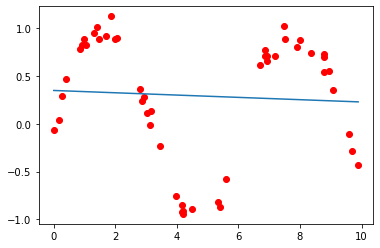

In [145]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]# по рисунку видим, что получили хрень
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(testx))

In [54]:
model.score(X,y)# позорище, а не модель

0.003269744706462907

А теперь добавим другой базис. Видно, что функция похожа на степенную. Используем полиномиальный базис.
Класс [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) позволяет преобразовать ваши данные  и перейти от стандартного базиса ${x_1,x_2,...x_n}$ полиномиальному базису, который состоит из всех возможных функций $x_1^{k1}x_2^{k2}...x_n^{kn} : k1+k2+...kn<=4$

In [639]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)

In [410]:
X_new = poly_reg.fit_transform(X)

In [411]:
X_new; #вместо одного x теперь целый вектор фич степени от 0 до 4

In [412]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [413]:
model.fit(X_new, y)

LinearRegression()

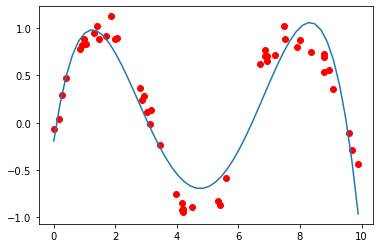

In [414]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(poly_reg.fit_transform(testx)))
# теперь для предсказания модели нужно передавать преобразованные в тот же базис данные
# результат лучше

In [62]:
model.score(X_new,y)# уже лучше!

0.8709660328448421

In [63]:
(model.coef_,model.intercept_) # а вот и полученные веса для базисных функций. 

(array([ 0.        ,  2.16741907, -1.22565575,  0.20937262, -0.01096061]),
 -0.1959994705982323)

In [64]:
model = LinearRegression(fit_intercept=False)
model

LinearRegression(fit_intercept=False)

In [65]:
model.fit(X_new, y)

LinearRegression(fit_intercept=False)

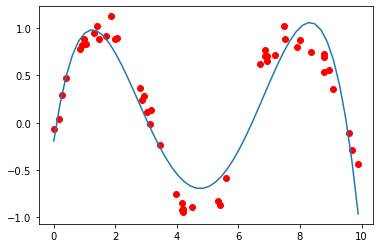

In [66]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(poly_reg.fit_transform(testx)))
# теперь для предсказания модели нужно передавать преобразованные в тот же базис данные
# результат лучше

In [67]:
model.score(X_new,y)# уже лучше!

0.870966032844843

In [68]:
(model.coef_,model.intercept_) # а вот и полученные веса для базисных функций. 

(array([-0.19599947,  2.16741907, -1.22565575,  0.20937262, -0.01096061]), 0.0)

**Упражнение** Подумайте, за что отвечает параметр fit_intercept и почему первый коэффициент равен 0

fit_intercept - логический параметр, отсутствие или присутствие свободного члена.

<font color = 'orange' size = 3>Пример 2 </font>

Теперь возьмём многомерные фичи. Используем рыбный датасет из файла Fish.csv и попробуем создать модель регрессии для предсказания веса (столбец weight).

Попробуем использовать стандартную формулу для классической регрессии $f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $.


In [69]:
dataframe=pd.read_csv("Fish.csv") # загружаем данные
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [70]:
X = dataframe.drop(["Species","Weight"],axis=1).values # выбираем то, что будет фичами

In [41]:
X

array([[23.2   , 25.4   , 30.    , 11.52  ,  4.02  ],
       [24.    , 26.3   , 31.2   , 12.48  ,  4.3056],
       [23.9   , 26.5   , 31.1   , 12.3778,  4.6961],
       [26.3   , 29.    , 33.5   , 12.73  ,  4.4555],
       [26.5   , 29.    , 34.    , 12.444 ,  5.134 ],
       [26.8   , 29.7   , 34.7   , 13.6024,  4.9274],
       [26.8   , 29.7   , 34.5   , 14.1795,  5.2785],
       [27.6   , 30.    , 35.    , 12.67  ,  4.69  ],
       [27.6   , 30.    , 35.1   , 14.0049,  4.8438],
       [28.5   , 30.7   , 36.2   , 14.2266,  4.9594],
       [28.4   , 31.    , 36.2   , 14.2628,  5.1042],
       [28.7   , 31.    , 36.2   , 14.3714,  4.8146],
       [29.1   , 31.5   , 36.4   , 13.7592,  4.368 ],
       [29.5   , 32.    , 37.3   , 13.9129,  5.0728],
       [29.4   , 32.    , 37.2   , 14.9544,  5.1708],
       [29.4   , 32.    , 37.2   , 15.438 ,  5.58  ],
       [30.4   , 33.    , 38.3   , 14.8604,  5.2854],
       [30.4   , 33.    , 38.5   , 14.938 ,  5.1975],
       [30.9   , 33.5   , 38

In [71]:
y = dataframe["Weight"].values # вес будем предсказывать

In [267]:
y;

In [73]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model

LinearRegression()

In [74]:
model.fit(X, y)

LinearRegression()

In [75]:
model.score(X,y)

0.8852867046546207

In [76]:
(model.coef_,model.intercept_)

(array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]),
 -499.58695535694244)

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите подробно описанные выше примеры.
2. Реализуйте функции для работы регрессии по произвольному базису самостоятельно (используйте только базовые функции и numpy), используя формулы, полученные выше. Используйте матричные вычисления!
3. Попрактикуйте модели и вашу и встроенную на разных искусственных данных.
4. Постройте модели (встроенную и вашу) для прогнозирования веса рыбы из файла Fish.csv. Попробуйте различные базисы, различные комбинации фич и постарайтесь повысить точность прогноза.
5. Попытайтесь предсказать [Perfomance index](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) студентов используя вашу собственную и встроенные модели с различными базисами. 
6. Подумайте, как повлияет на модель использование слишком большого количества базисных фич.
7. В примере выше мы тестируем полученную модель на тех же данных, что и обучаем. В целом это не очень хорошо. Разделите изначальные данные на обучающую и тестовую выборку и повторите вычисления точности.


Указание! Для оценки качества модели, в случае, если рисунок не возможен используйте [коэффициент детерминации](https://wiki.loginom.ru/articles/coefficient-of-determination.html): $$R^{2}=1-\frac{(\overline{y} -f(\overline{x}))(\overline{y} - f(\overline{x}))^{T}}{(\overline{y} - mean(\overline{y}))(\overline{y} - mean(\overline{y}))^{T}},$$

где $\overline{y}$ - столбец обучающих меток, $f(\overline{x})$ - функция предсказания применённая к вектор столбцу исходных признаков. 

#### 1

$$\overline{w} = (Q^{T} Q)^{-1} Q^{T} \overline{y}$$.

In [632]:
def Qmatrix(X):
    return np.hstack((np.ones((X.shape[0],1)),X))

def fit(X, Y):
    Q = Qmatrix(X)
    return np.dot(np.dot(np.linalg.inv(np.dot(Q.T, Q) + 0.001 * np.eye(Q.shape[1])), Q.T),Y)

In [633]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
X = x[:, np.newaxis]
(X.shape,x.shape)

((50, 1), (50,))

In [634]:
coef = fit(X,y)

In [635]:
from sklearn.linear_model import LinearRegression #пробуем обучить стандартную модель регрессии из ЛР1 
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
(X.shape,x.shape)
model.fit(X, y)

LinearRegression()

In [636]:
test = coef[0] + testx*coef[1]

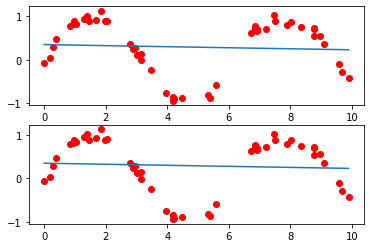

In [637]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]# по рисунку видим, что получили хрень
plt.subplot(2, 1, 1)
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(testx))

plt.subplot(2, 1, 2)
plt.scatter(x, y, c ='red')
plt.plot(testx,test)

In [640]:
X_new = poly_reg.fit_transform(X)
X_new[0]

array([  1.        ,   4.17022005,  17.39073524,  72.52319273,
       302.43767221])

In [641]:
coef = fit(X_new,y)
coef;

In [649]:
def Qmatrix(X):
    return np.hstack((np.ones((X.shape[0],1)),X))

def fit(X, Y):
    Q = Qmatrix(X)
    return np.dot(np.dot(np.linalg.inv(np.dot(Q.T, Q) + 0.001 * np.eye(Q.shape[1])), Q.T),Y)

def predict(X, coef):
    return np.dot(Qmatrix(X), coef)

def score(X, y, coef):
    f = predict(X, coef)
    numerator = np.dot((y - f), (y - f).T)
    denominator = np.dot((y - np.mean(y)), (y - np.mean(y).T))
    return float(1 - numerator/denominator)

In [643]:
test = predict(poly_reg.fit_transform(testx), fit(X_new,y))

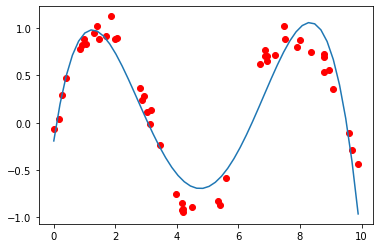

In [644]:
plt.scatter(x, y, c ='red')
plt.plot(testx, test)

In [501]:
score(X_new, y, coef)

0.8709657526203783

In [663]:
poly_reg=PolynomialFeatures(degree=12)

In [664]:
X_new = poly_reg.fit_transform(X)
coef = fit(X_new,y)
test = predict(poly_reg.fit_transform(testx), fit(X_new,y))

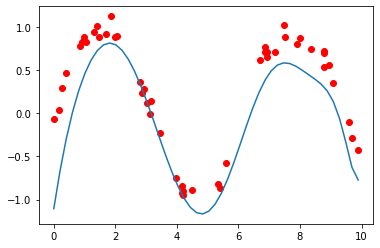

In [665]:
plt.scatter(x, y, c ='red')
plt.plot(testx, test)

In [666]:
score(X_new, y, coef)

0.6993507604803618

#### 4

In [552]:
dataframe=pd.read_csv("Fish.csv") # загружаем данные
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [553]:
X = dataframe.drop(["Species","Weight"],axis=1).values # выбираем то, что будет фичами

In [554]:
y = dataframe["Weight"].values # вес будем предсказывать

In [555]:
X.shape, y.shape

((159, 5), (159,))

In [556]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model

LinearRegression()

In [557]:
model.fit(X, y)

LinearRegression()

In [558]:
model.score(X,y)

0.8852867046546207

In [560]:
(model.coef_,model.intercept_)

(array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]),
 -499.58695535694244)

In [561]:
fit(X, y)

array([-499.55932281,   62.35573526,   -6.52486724,  -29.02883903,
         28.29833293,   22.46907124])

In [562]:
score(X, y, fit(X, y))

0.8852867039742763

In [524]:
poly_reg=PolynomialFeatures(degree=2)
X_new = poly_reg.fit_transform(X)
X_new.shape

(159, 21)

In [526]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model.fit(X_new, y)
print(model.score(X_new,y))
(model.coef_,model.intercept_)

0.9832188512811134


(array([  0.        , -32.39011451, -31.00709464,  29.32814152,
        -18.43858613,  75.53108501, -32.09586506,  -2.61212618,
         53.68171679, -26.41523247,  78.72967274,  18.43039898,
        -29.13138047,  15.72566571, -35.40026424,  -8.24624136,
          9.32959677, -41.75475777,  -7.54251852,  32.83656085,
         -8.21563929]),
 177.40519033969758)

In [529]:
score(X_new, y, fit(X_new, y))

0.9832188490817957

In [530]:
poly_reg=PolynomialFeatures(degree=3)
X_new = poly_reg.fit_transform(X)
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model.fit(X_new, y)
model.score(X_new,y)

0.9926572416056407

In [531]:
score(X_new, y, fit(X_new, y))

0.9926574599090674

In [534]:
poly_reg=PolynomialFeatures(degree=4)
X_new = poly_reg.fit_transform(X)
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model.fit(X_new, y)
model.score(X_new,y)

0.9731066352503596

#### 5

In [563]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [564]:
X, y = df.drop(['Performance Index'], axis=1), df['Performance Index']

In [565]:
X['Extracurricular Activities'] = X['Extracurricular Activities'].map({"Yes": 1, "No": 0})

In [566]:
X = X.values
y = y.values

In [567]:
X.shape, y.shape

((10000, 5), (10000,))

In [568]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model.fit(X, y)
model.score(X,y)

0.9887523323780958

In [569]:
score(X, y, fit(X, y))

0.9887523323768626

In [570]:
poly_reg=PolynomialFeatures(degree=2)
X_new = poly_reg.fit_transform(X)
model = LinearRegression(fit_intercept=True)
model.fit(X_new, y)
model.score(X_new,y)

0.9887688847899551

In [571]:
score(X_new, y, fit(X_new, y))

0.9887688847819341

In [583]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [586]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9889832909573145

In [584]:
coef = fit(X_train, y_train)

In [585]:
score(X_test, y_test, coef)

0.9889832731323628

to be continued... 🧡